# plotter code
This code is for plotting trajectories of different agents, and some analysis

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import glob
import os

overallpath="C:/Users/dexte/Documents/GitHub/ant_trajectory/"
datapath="success_plots_csvs/"
csv_files=[]


In [ ]:
filepath = overallpath+datapath
csv_files = glob.glob(os.path.join(filepath, "*.csv"))
dataset=[]
for file in csv_files:
    csv_files.append(file)
    dataset.append(pd.read_csv(file))

Index(['Unnamed: 0', 'frame_number', 'body_x', 'body_y', 'body_prob', 'time',
       'headings', 'in_arena', 'body_x_cm', 'body_y_cm', 'rel_x', 'rel_y',
       'rel_x_cm', 'rel_y_cm', 'food_rel_x', 'food_rel_y', 'food_rel_x_cm',
       'food_rel_y_cm', 'dist_to_food_cm'],
      dtype='object')


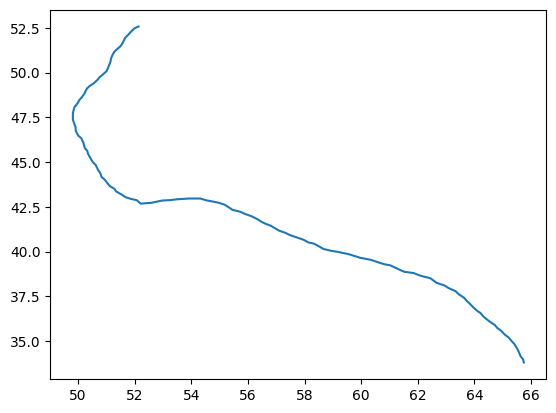

In [11]:
print(dataset[0].keys())
example=dataset[5]
plt.plot(example['body_x_cm'],example['body_y_cm'])
plt.show()

## heatmap of paths

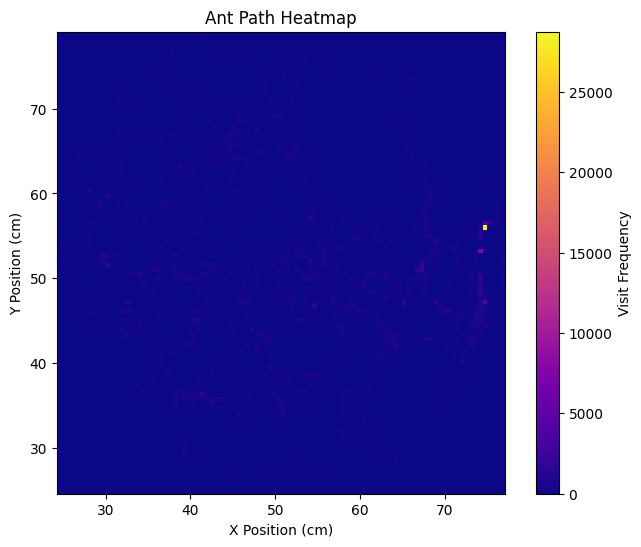

In [ ]:
all_x = []
all_y = []

for example in dataset[0:500]:
    all_x.extend(example['body_x_cm'])
    all_y.extend(example['body_y_cm'])

heatmap, xedges, yedges = np.histogram2d(all_x, all_y, bins=100)

#plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(
    heatmap.T, origin='lower',
    extent=[min(all_x), max(all_x), min(all_y), max(all_y)],
    cmap='hot', interpolation='nearest'
)
plt.colorbar(label='Visit Frequency')
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title('Ant Path Heatmap')
plt.show()